# Keras LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Download data
Dataset: [International airline passengers | Kaggle](https://www.kaggle.com/andreazzini/international-airline-passengers)

<img src="https://s.abcnews.com/images/International/united-airlines-gty-er-190120_hpMain_12x5_992.jpg" width=50%>

In [2]:
from urllib import request

url = "http://dv129ryj03col.cloudfront.net/international-airline-passengers.csv"
request.urlretrieve(url, "./inputs/international-airline-passengers.csv")

('./inputs/international-airline-passengers.csv',
 <http.client.HTTPMessage at 0x113b2b7f0>)

In [3]:
df = pd.read_csv("./inputs/international-airline-passengers.csv")
df.columns = ["Month","Passengers"]

In [4]:
# Check the data.
df.tail(3)

,Month,Passengers
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
# Remove the meta data row.
df = df.iloc[:-1]

## Visualize

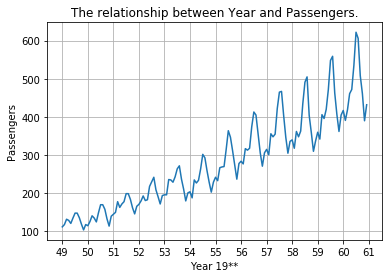

In [6]:
plt.plot(df['Passengers'])
plt.xticks([12*i for i in range(13)], [49+i for i in range(13)])
plt.title("The relationship between Year and Passengers.")
plt.xlabel("Year 19**")
plt.ylabel("Passengers")
plt.grid()
plt.show()

## Component analysis
Using [Autoregressive integrated moving average(ARIMA) model](https://sites.google.com/site/econometricsacademy/econometrics-models/time-series-arima-models).
- <b>Trend</b>: The increasing or decreasing value in the series.
- <b>Seasonal</b>: The repeating short-term cycle in the series.
- <b>Residual</b>: The random variation in the series.

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
sd = seasonal_decompose(df['Passengers'].values, freq=12)

/Users/iwasakishuto/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Trend

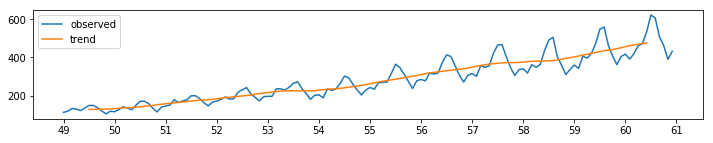

In [8]:
plt.figure(figsize=(12,2))
plt.plot(sd.__dict__["observed"], label="observed")
plt.plot(sd.__dict__["trend"], label="trend")
plt.xticks([12*i for i in range(13)], [49+i for i in range(13)])
plt.legend()
plt.show()

### Seasonal

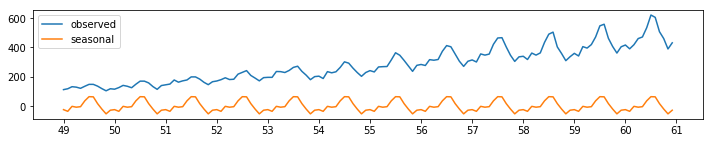

In [9]:
plt.figure(figsize=(12,2))
plt.plot(sd.__dict__["observed"], label="observed")
plt.plot(sd.__dict__["seasonal"], label="seasonal")
plt.xticks([12*i for i in range(13)], [49+i for i in range(13)])
plt.legend()
plt.show()

### Residual

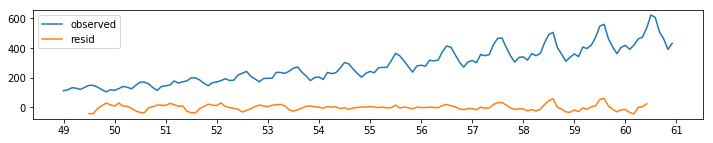

In [10]:
plt.figure(figsize=(12,2))
plt.plot(sd.__dict__["observed"], label="observed")
plt.plot(sd.__dict__["resid"], label="resid")
plt.xticks([12*i for i in range(13)], [49+i for i in range(13)])
plt.legend()
plt.show()

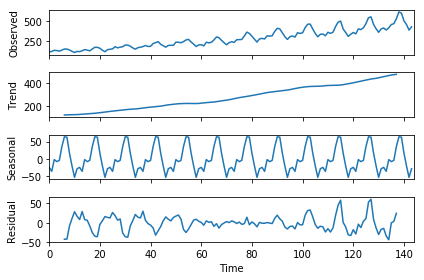

In [11]:
sd.plot()
plt.show()

## Preprocessing

In [12]:
data = df['Passengers'].values.astype('float32')

In [13]:
# Normalization
scale = data.max()
data /= scale

In [14]:
X = data[:-1] # Input
y = data[1:]  # Output

In [15]:
print('Input :',len(X))
print('Output:', len(y))

Input : 143
Output: 143


In [16]:
print('Input:', np.shape(X), ' Output:', np.shape(y))

Input: (143,)  Output: (143,)


In [17]:
X = X.reshape(len(X), 1, 1)
y = y.reshape(len(y), 1)

In [18]:
print('Input:', np.shape(X), ' Output:', np.shape(y))

Input: (143, 1, 1)  Output: (143, 1)


## Train-Test split
- <b>Train</b>: Old sequence
- <b>Test</b>:  New sequence

In [19]:
train_size = int(len(data) * 0.7)

In [20]:
# Split
X_train = X[:train_size]
X_test  = X[train_size:]
y_train = y[:train_size]
y_test  = y[train_size:]

In [21]:
print('X_train:', X_train.shape)
print('X_test :', X_test.shape)
print('y_train:', y_train.shape)
print('y_test :', y_test.shape)

X_train: (100, 1, 1)
X_test : (43, 1, 1)
y_train: (100, 1)
y_test : (43, 1)


## LSTM

In [22]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
import tensorflow as tf

Using TensorFlow backend.


In [23]:
N_units = 30
batch_size = None
time_step = 1 # How old cell take into account.
input_dim = 1 # feature dimention

In [24]:
model = Sequential()
model.add(LSTM(N_units, batch_input_shape=(batch_size, time_step, input_dim)))
model.add(Dense(1))

Instructions for updating:
Colocations handled automatically by placer.


In [25]:
adam = keras.optimizers.Adam()
model.compile(loss='mean_squared_error', optimizer=adam)

In [26]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 30)                3840      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 3,871
Trainable params: 3,871
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file="./img/model.png", show_shapes=True)

<img src="./img/model.png">

## Training

In [28]:
# 学習開始
hist = model.fit(X_train,
                 y_train,
                 epochs=200,
                 validation_data=(X_test, y_test),
                 verbose=0,
                 batch_size=20)

Instructions for updating:
Use tf.cast instead.


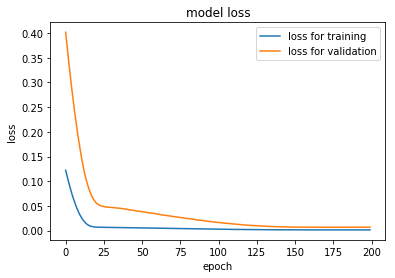

In [29]:
plt.plot(hist.history['loss'],label="loss for training")
plt.plot(hist.history['val_loss'],label="loss for validation")
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(loc='best')
plt.show()

## Prediction

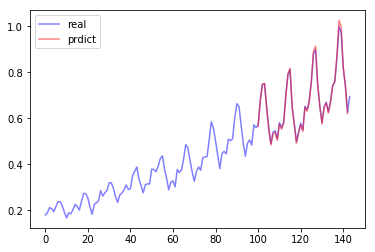

In [30]:
y_pred = model.predict(X)

# プロット
plt.plot(data, color='blue', label="real", alpha=0.5)
plt.plot([train_size + i for i in range(len(y_test))], y_pred[train_size:], color='red', label="prdict", alpha=0.5)
plt.legend()
plt.show()